In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.animation import FuncAnimation

In [2]:
countymap = gpd.read_file('../../data/Davidson_County_Boundary.geojson')
streets = gpd.read_file('../../data/Street_Centerlines.geojson')

In [15]:
dispatches = pd.read_csv('../../data/active_dispatch_ticks.csv')
colordf = pd.read_csv('../../data/colors.csv')

In [31]:
savefile = '../../imgs/1pm-10pm.gif.gif'

In [17]:
dispatches = dispatches.merge(colordf, on='code', how='inner')

In [39]:
start_tick = 391 #391 #1pm
last_tick = 661 #661 #10pm

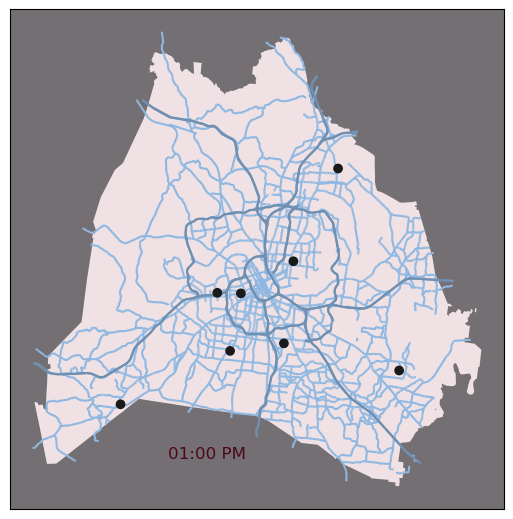

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)

def animate(i): 
    #fig.clear()
    ax.clear()
    
    countymap.plot(ax = ax, color = '#EFE1E4')
    
    plt.xticks([])
    plt.yticks([])

    ax.set_facecolor("#746F72")

    #medium roads
    streets[(streets['CLASS'] == 3.0) | (streets['CLASS'] == 4.0) | (streets['CLASS'] == 5.0)].plot(ax = ax,
                    color = '#8EB8E2', zorder=1)
        
    #bigger roads
    streets[(streets['CLASS'] == 1.0) | (streets['CLASS'] == 2.0)].plot(ax = ax,
                    color='#7090B2', zorder=2)
    
    tickdf = dispatches[dispatches['tick'] == i].reset_index(drop = True)

    ax.scatter(tickdf['lon'], tickdf['lat'], color=tickdf['color'], zorder=3)
    plt.text(-86.8, 36, tickdf.loc[0,'display_clock'], fontsize=12, color='#4C061D', ha='right', va='center', zorder=4)

anim = FuncAnimation(fig, animate, frames=range(start_tick, last_tick+1))
anim.save(savefile, writer='pillow', fps=15, dpi=240)